In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import argparse
from sklearn.preprocessing import MinMaxScaler

In [33]:
file="../Physicell/output/new_results/mechanics_pushing_dt0.01_nucl/cells_position_time.csv"
df = pd.read_csv(file).sort_values(by=['dt']).reset_index(drop=True)
pc_dist_dt =  abs(df[df['id']==0]['x'].reset_index() - df[df['id']==1]['x'].reset_index())
pc_dist_dt["dt"] = df['dt'].unique()
pc_dist_dt
pc_dist_dt.rename({"x":"dx"},inplace=True,axis=1)
pc_dist_dt.drop("index",axis=1,inplace=True)

In [34]:
# file = "../Physicell/output/new_results/mechanics_pushing_dt0.01/cells_position_time.csv"
# df = pd.read_csv(file).sort_values(by=['dt']).reset_index(drop=True)
# pc_dist_dt =  abs(df[df['id']==0]['x'].reset_index() - df[df['id']==1]['x'].reset_index())
# pc_dist_dt["dt"] = df['dt'].unique()
# pc_dist_dt
# pc_dist_dt.rename({"x":"dx"},inplace=True,axis=1)
# pc_dist_dt.drop("index",axis=1,inplace=True)



In [35]:
file = "../Physicell/output/new_results/mechanics_pushing_rep100/cells_position_time.csv"
df = pd.read_csv(file).sort_values(by=['dt']).reset_index(drop=True)
df

,id,x,y,z,radius,nuclear_radius,ms,mbx,dt
0,0.0,-15.000000,0.0,0.0,5.000004,3.149805,10.0,1.0,0.0
1,1.0,15.000000,0.0,0.0,5.000004,3.149805,10.0,-1.0,0.0
2,0.0,-13.500000,0.0,0.0,5.000004,3.149805,10.0,1.0,0.1
3,1.0,13.500000,0.0,0.0,5.000004,3.149805,10.0,-1.0,0.1
4,0.0,-12.500000,0.0,0.0,5.000004,3.149805,10.0,1.0,0.2
...,...,...,...,...,...,...,...,...,...
197,1.0,4.713073,0.0,0.0,5.000004,3.149805,10.0,-1.0,9.8
198,0.0,-2.774098,0.0,0.0,5.000004,3.149805,10.0,1.0,9.9
199,1.0,2.774098,0.0,0.0,5.000004,3.149805,10.0,-1.0,9.9
200,0.0,-4.713073,0.0,0.0,5.000004,3.149805,10.0,1.0,10.0


In [36]:
pc_dist =  abs(df[df['id']==0]['x'].reset_index() - df[df['id']==1]['x'].reset_index())
pc_dist["dt"] = df['dt'].unique()
pc_dist
pc_dist.rename({"x":"dx"},inplace=True,axis=1)
pc_dist.drop("index",axis=1,inplace=True)


In [37]:
file = "../Biodynamo/unit_test_mechanics_pushing/results/positions.csv"
df = pd.read_csv(file,index_col=0,header = None,sep='\t|,',engine='python').rename(columns={1: "x1", 4: "x2"})
df.loc[0] = [-15,0,0,15,0,0]
df['dx'] = abs(df["x1"] - df["x2"])
bd_dist = df
bd_dist


,x1,2,3,x2,5,6,dx
0,,,,,,,
0,-15,0,0,15,0,0,30
1,-13,0,1,13,0,0,26
2,-12,0,2,12,0,0,24
3,-11,0,3,11,0,0,22
4,-10,0,4,10,0,0,20
...,...,...,...,...,...,...,...
95,-6,0,95,6,0,0,12
96,-6,0,96,6,0,0,12
97,-6,0,97,6,0,0,12


In [38]:
file = "../Tisim/mechanical pushing.csv"
ts_dist = pd.read_csv(file,index_col=None,header=0,names=['time','dx'])
ts_dist

,time,dx
0,0.0,30.0000
1,0.1,28.0000
2,0.2,26.0000
3,0.3,24.0000
4,0.4,22.0000
...,...,...
96,9.6,3.2168
97,9.7,3.2168
98,9.8,3.2168
99,9.9,3.2168


In [39]:
file = "../Chaste/unit_test_mechanics_pushing/results/results.viznodelocations"
ch_dist = pd.read_csv(file,header = None,sep='\t| ',index_col=0,engine='python')
ch_dist['dx'] = abs(ch_dist[2] - ch_dist[1])*10
ch_dist.index = ch_dist.index*1000

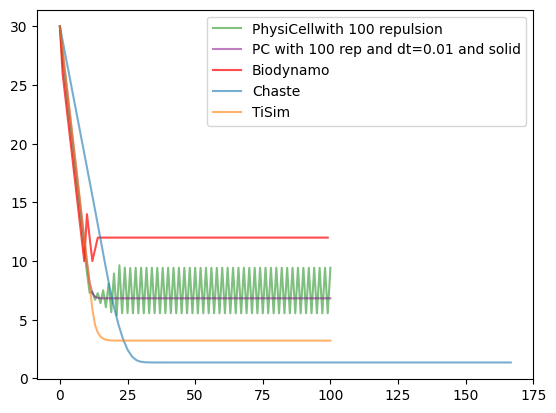

In [44]:
plt.plot(pc_dist.index,pc_dist['dx'],label="PhysiCellwith 100 repulsion", color= 'green',alpha = 0.5)
plt.plot(pc_dist_dt.index,pc_dist_dt['dx'],label="PC with 100 rep and dt=0.01 and solid", color= 'purple',alpha = 0.5)
plt.plot(bd_dist.index,bd_dist['dx'],label="Biodynamo",color= 'red',alpha = 0.7)
plt.plot(ch_dist.index,ch_dist['dx'],label="Chaste",alpha = 0.6)
plt.plot(ts_dist.index,ts_dist['dx'],label="TiSim",alpha = 0.6)
plt.legend()

In [41]:
# 